#  Wrangle and Analyze Data
**by Yash Viras**

# Overview

In This project we focused on wrangling data from the WeRateDogs Twitter account using Python, documented in a Jupyter Notebook (wrangle_act.ipynb).

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.


# Project Tasks

 

The tasks for this project are:
  * Gathering data
  * Assessing data
  * Cleaning data

## Gathering Data

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import time
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# load the twitter-archive-enhanced.csv into a DataFrame
archi = pd.read_csv('twitter-archive-enhanced.csv')
archi.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# download the image prediction file from Udacity's server using the requests function
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
# load the image predictions data into a DataFrame
predictions = pd.read_csv('image-predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# load the data Tweeter API

CONSUMER_KEY = "MY_KEY"
CONSUMER_SECRET = "MY_SECRET_KEX"
ACCESS_TOKEN = "MY_TOKEN"
ACCESS_TOKEN_SECRET = "MY_SECRET_TOKEN"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [6]:
missing_tweets = []

with open ('tweet_json.txt', 'a') as file:
    for tweet_id in archi['tweet_id']:
        try:
            start_time = time.time()
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # writes one tweet per line
            file.write(json.dumps(tweet) + '\n')
            end_time = time.time()
            print('ID {} . Time in seconds: {}'.format(tweet_id, end_time-start_time))
        except Exception as e_message:
            missing_tweets.append(tweet_id)
            print("Error for ID: " + str(tweet_id) + str(e_message))
    print('End reached.')

ID 892420643555336193 . Time in seconds: 0.17705297470092773
ID 892177421306343426 . Time in seconds: 0.18077468872070312
ID 891815181378084864 . Time in seconds: 0.1784343719482422
ID 891689557279858688 . Time in seconds: 0.177170991897583
ID 891327558926688256 . Time in seconds: 0.17224550247192383
ID 891087950875897856 . Time in seconds: 0.17743945121765137
ID 890971913173991426 . Time in seconds: 0.188551664352417
ID 890729181411237888 . Time in seconds: 0.17497777938842773
ID 890609185150312448 . Time in seconds: 0.17727184295654297
ID 890240255349198849 . Time in seconds: 0.17732977867126465
ID 890006608113172480 . Time in seconds: 0.17775321006774902
ID 889880896479866881 . Time in seconds: 0.17905783653259277
ID 889665388333682689 . Time in seconds: 0.20290160179138184
ID 889638837579907072 . Time in seconds: 0.1671583652496338
ID 889531135344209921 . Time in seconds: 0.17933368682861328
ID 889278841981685760 . Time in seconds: 0.17166757583618164
ID 888917238123831296 . Time i

ID 866720684873056260 . Time in seconds: 0.23949098587036133
ID 866686824827068416 . Time in seconds: 0.17728018760681152
ID 866450705531457537 . Time in seconds: 0.18945813179016113
ID 866334964761202691 . Time in seconds: 0.1804332733154297
ID 866094527597207552 . Time in seconds: 0.198042631149292
ID 865718153858494464 . Time in seconds: 0.18185901641845703
ID 865359393868664832 . Time in seconds: 0.17501330375671387
ID 865006731092295680 . Time in seconds: 0.1702289581298828
ID 864873206498414592 . Time in seconds: 0.1820228099822998
ID 864279568663928832 . Time in seconds: 0.19166946411132812
ID 864197398364647424 . Time in seconds: 0.21097159385681152
ID 863907417377173506 . Time in seconds: 0.17278528213500977
ID 863553081350529029 . Time in seconds: 0.1919257640838623
ID 863471782782697472 . Time in seconds: 0.19136977195739746
ID 863432100342583297 . Time in seconds: 0.18341970443725586
ID 863427515083354112 . Time in seconds: 0.19497919082641602
ID 863079547188785154 . Time i

ID 841439858740625411 . Time in seconds: 0.22897768020629883
ID 841320156043304961 . Time in seconds: 0.19444727897644043
ID 841314665196081154 . Time in seconds: 0.1744701862335205
ID 841077006473256960 . Time in seconds: 0.17994093894958496
ID 840761248237133825 . Time in seconds: 0.21648001670837402
ID 840728873075638272 . Time in seconds: 0.19501996040344238
ID 840698636975636481 . Time in seconds: 0.19307899475097656
ID 840696689258311684 . Time in seconds: 0.17035579681396484
ID 840632337062862849 . Time in seconds: 0.19574189186096191
ID 840370681858686976 . Time in seconds: 0.19568681716918945
ID 840268004936019968 . Time in seconds: 0.21910667419433594
ID 839990271299457024 . Time in seconds: 0.18137335777282715
ID 839549326359670784 . Time in seconds: 0.17264795303344727
ID 839290600511926273 . Time in seconds: 0.18447399139404297
ID 839239871831150596 . Time in seconds: 0.24924945831298828
ID 838952994649550848 . Time in seconds: 0.20622014999389648
ID 838921590096166913 . T

ID 824325613288833024 . Time in seconds: 0.20751142501831055
ID 824297048279236611 . Time in seconds: 0.17460083961486816
ID 824025158776213504 . Time in seconds: 0.20044183731079102
ID 823939628516474880 . Time in seconds: 0.1883080005645752
ID 823719002937630720 . Time in seconds: 0.1978435516357422
ID 823699002998870016 . Time in seconds: 0.18743443489074707
ID 823581115634085888 . Time in seconds: 0.1777787208557129
ID 823333489516937216 . Time in seconds: 0.19620180130004883
ID 823322678127919110 . Time in seconds: 0.16756534576416016
ID 823269594223824897 . Time in seconds: 0.1811370849609375
ID 822975315408461824 . Time in seconds: 0.2036597728729248
ID 822872901745569793 . Time in seconds: 0.17909455299377441
ID 822859134160621569 . Time in seconds: 0.18514323234558105
ID 822647212903690241 . Time in seconds: 0.21314191818237305
ID 822610361945911296 . Time in seconds: 0.17478346824645996
ID 822489057087389700 . Time in seconds: 0.19046735763549805
ID 822462944365645825 . Time 

ID 806620845233815552 . Time in seconds: 0.1987292766571045
ID 806576416489959424 . Time in seconds: 0.2823450565338135
ID 806542213899489280 . Time in seconds: 0.19720458984375
ID 806242860592926720 . Time in seconds: 0.1850285530090332
ID 806219024703037440 . Time in seconds: 0.17033672332763672
ID 805958939288408065 . Time in seconds: 0.20788097381591797
ID 805932879469572096 . Time in seconds: 0.18408894538879395
ID 805826884734976000 . Time in seconds: 0.17976880073547363
ID 805823200554876929 . Time in seconds: 0.2897765636444092
ID 805520635690676224 . Time in seconds: 0.22788643836975098
ID 805487436403003392 . Time in seconds: 0.18453693389892578
ID 805207613751304193 . Time in seconds: 0.17629480361938477
ID 804738756058218496 . Time in seconds: 0.18263006210327148
ID 804475857670639616 . Time in seconds: 0.20168566703796387
ID 804413760345620481 . Time in seconds: 0.2116391658782959
ID 804026241225523202 . Time in seconds: 0.18173456192016602
ID 803773340896923648 . Time in 

ID 789599242079838210 . Time in seconds: 0.18877363204956055
ID 789530877013393408 . Time in seconds: 0.17432928085327148
ID 789314372632018944 . Time in seconds: 0.341402530670166
ID 789280767834746880 . Time in seconds: 0.268413782119751
ID 789268448748703744 . Time in seconds: 0.17502999305725098
ID 789137962068021249 . Time in seconds: 0.19764375686645508
ID 788908386943430656 . Time in seconds: 0.17404723167419434
ID 788765914992902144 . Time in seconds: 0.20816707611083984
ID 788552643979468800 . Time in seconds: 0.19298386573791504
ID 788412144018661376 . Time in seconds: 0.18460893630981445
ID 788178268662984705 . Time in seconds: 0.25370240211486816
ID 788150585577050112 . Time in seconds: 0.22872638702392578
ID 788070120937619456 . Time in seconds: 0.18614506721496582
ID 788039637453406209 . Time in seconds: 0.1975116729736328
ID 787810552592695296 . Time in seconds: 0.18517470359802246
ID 787717603741622272 . Time in seconds: 0.21340036392211914
ID 787397959788929025 . Time 

ID 771770456517009408 . Time in seconds: 0.20804810523986816
ID 771500966810099713 . Time in seconds: 0.22542309761047363
ID 771380798096281600 . Time in seconds: 0.18367528915405273
ID 771171053431250945 . Time in seconds: 0.2034599781036377
ID 771136648247640064 . Time in seconds: 0.17641830444335938
ID 771102124360998913 . Time in seconds: 0.19025158882141113
ID 771014301343748096 . Time in seconds: 0.17622113227844238
ID 771004394259247104 . Time in seconds: 0.23015999794006348
ID 770787852854652928 . Time in seconds: 0.17337656021118164
ID 770772759874076672 . Time in seconds: 0.2124321460723877
Error for ID: 770743923962707968[{'code': 144, 'message': 'No status found with that ID.'}]
ID 770655142660169732 . Time in seconds: 0.19589900970458984
ID 770414278348247044 . Time in seconds: 0.17986345291137695
ID 770293558247038976 . Time in seconds: 0.17859721183776855
ID 770093767776997377 . Time in seconds: 0.1788022518157959
ID 770069151037685760 . Time in seconds: 0.20884728431701

ID 752701944171524096 . Time in seconds: 0.25137853622436523
ID 752682090207055872 . Time in seconds: 0.1746532917022705
ID 752660715232722944 . Time in seconds: 0.21453619003295898
ID 752568224206688256 . Time in seconds: 0.17297911643981934
ID 752519690950500352 . Time in seconds: 0.18375062942504883
ID 752334515931054080 . Time in seconds: 0.1912062168121338
ID 752309394570878976 . Time in seconds: 0.18214750289916992
ID 752173152931807232 . Time in seconds: 0.1739656925201416
ID 751950017322246144 . Time in seconds: 0.17763280868530273
ID 751937170840121344 . Time in seconds: 0.17891860008239746
ID 751830394383790080 . Time in seconds: 0.18661165237426758
ID 751793661361422336 . Time in seconds: 0.18364429473876953
ID 751598357617971201 . Time in seconds: 0.17711591720581055
ID 751583847268179968 . Time in seconds: 0.1796400547027588
ID 751538714308972544 . Time in seconds: 0.19072723388671875
ID 751456908746354688 . Time in seconds: 0.19891691207885742
ID 751251247299190784 . Time

ID 739238157791694849 . Time in seconds: 0.2060246467590332
ID 738891149612572673 . Time in seconds: 0.16778302192687988
ID 738885046782832640 . Time in seconds: 0.18024730682373047
ID 738883359779196928 . Time in seconds: 0.17746734619140625
ID 738537504001953792 . Time in seconds: 0.18776273727416992
ID 738402415918125056 . Time in seconds: 0.1917436122894287
ID 738184450748633089 . Time in seconds: 0.1729741096496582
ID 738166403467907072 . Time in seconds: 0.18162941932678223
ID 738156290900254721 . Time in seconds: 0.17932534217834473
ID 737826014890496000 . Time in seconds: 0.19439697265625
ID 737800304142471168 . Time in seconds: 0.17752742767333984
ID 737678689543020544 . Time in seconds: 0.2835657596588135
ID 737445876994609152 . Time in seconds: 0.17594695091247559
ID 737322739594330112 . Time in seconds: 0.286008358001709
ID 737310737551491075 . Time in seconds: 0.22923898696899414
ID 736736130620620800 . Time in seconds: 0.17669391632080078
ID 736392552031657984 . Time in s

ID 714982300363173890 . Time in seconds: 0.17769193649291992
ID 714962719905021952 . Time in seconds: 0.18261432647705078
ID 714957620017307648 . Time in seconds: 0.24167108535766602
ID 714631576617938945 . Time in seconds: 0.20611119270324707
ID 714606013974974464 . Time in seconds: 0.18285274505615234
ID 714485234495041536 . Time in seconds: 0.2056443691253662
ID 714258258790387713 . Time in seconds: 0.1774911880493164
ID 714251586676113411 . Time in seconds: 0.2069098949432373
ID 714214115368108032 . Time in seconds: 0.17478489875793457
ID 714141408463036416 . Time in seconds: 0.17975068092346191
ID 713919462244790272 . Time in seconds: 0.1700296401977539
ID 713909862279876608 . Time in seconds: 0.18502235412597656
ID 713900603437621249 . Time in seconds: 0.19460797309875488
ID 713761197720473600 . Time in seconds: 0.18084025382995605
ID 713411074226274305 . Time in seconds: 0.17097806930541992
ID 713177543487135744 . Time in seconds: 0.1727762222290039
ID 713175907180089344 . Time 

ID 703774238772166656 . Time in seconds: 0.17989468574523926
ID 703769065844768768 . Time in seconds: 0.2049117088317871
ID 703631701117943808 . Time in seconds: 0.22781991958618164
ID 703611486317502464 . Time in seconds: 0.18064355850219727
ID 703425003149250560 . Time in seconds: 0.1762087345123291
ID 703407252292673536 . Time in seconds: 0.17049884796142578
ID 703382836347330562 . Time in seconds: 0.19491338729858398
ID 703356393781329922 . Time in seconds: 0.1806631088256836
ID 703268521220972544 . Time in seconds: 0.18081378936767578
ID 703079050210877440 . Time in seconds: 0.17359209060668945
ID 703041949650034688 . Time in seconds: 0.16913533210754395
ID 702932127499816960 . Time in seconds: 0.23138141632080078
ID 702899151802126337 . Time in seconds: 0.1734168529510498
ID 702684942141153280 . Time in seconds: 0.21445035934448242
ID 702671118226825216 . Time in seconds: 0.18072128295898438
ID 702598099714314240 . Time in seconds: 0.1927042007446289
ID 702539513671897089 . Time 

ID 693095443459342336 . Time in seconds: 0.17973995208740234
ID 692919143163629568 . Time in seconds: 0.20858120918273926
ID 692905862751522816 . Time in seconds: 0.19161176681518555
ID 692901601640583168 . Time in seconds: 0.19237518310546875
ID 692894228850999298 . Time in seconds: 0.2077322006225586
ID 692828166163931137 . Time in seconds: 0.18838858604431152
ID 692752401762250755 . Time in seconds: 0.19614481925964355
ID 692568918515392513 . Time in seconds: 0.1788477897644043
ID 692535307825213440 . Time in seconds: 0.17381572723388672
ID 692530551048294401 . Time in seconds: 0.19328022003173828
ID 692423280028966913 . Time in seconds: 0.18797564506530762
ID 692417313023332352 . Time in seconds: 0.19103050231933594
ID 692187005137076224 . Time in seconds: 0.21037936210632324
ID 692158366030913536 . Time in seconds: 0.1892383098602295
ID 692142790915014657 . Time in seconds: 0.1799483299255371
ID 692041934689402880 . Time in seconds: 0.1830000877380371
ID 692017291282812928 . Time 

ID 684902183876321280 . Time in seconds: 0.18817830085754395
ID 684880619965411328 . Time in seconds: 0.18253755569458008
ID 684830982659280897 . Time in seconds: 0.1703650951385498
ID 684800227459624960 . Time in seconds: 0.19487404823303223
ID 684594889858887680 . Time in seconds: 0.17136335372924805
ID 684588130326986752 . Time in seconds: 0.19696378707885742
ID 684567543613382656 . Time in seconds: 0.17815089225769043
ID 684538444857667585 . Time in seconds: 0.19516968727111816
ID 684481074559381504 . Time in seconds: 0.18454456329345703
ID 684460069371654144 . Time in seconds: 0.1869182586669922
ID 684241637099323392 . Time in seconds: 0.18896222114562988
ID 684225744407494656 . Time in seconds: 0.19204163551330566
ID 684222868335505415 . Time in seconds: 0.19191718101501465
ID 684200372118904832 . Time in seconds: 0.25025391578674316
ID 684195085588783105 . Time in seconds: 0.2273697853088379
ID 684188786104872960 . Time in seconds: 0.21573615074157715
ID 684177701129875456 . Tim

ID 678755239630127104 . Time in seconds: 0.2153475284576416
ID 678740035362037760 . Time in seconds: 0.1946547031402588
ID 678708137298427904 . Time in seconds: 0.19352054595947266
ID 678675843183484930 . Time in seconds: 0.18618249893188477
ID 678643457146150913 . Time in seconds: 0.21143078804016113
ID 678446151570427904 . Time in seconds: 0.19173169136047363
ID 678424312106393600 . Time in seconds: 0.18977808952331543
ID 678410210315247616 . Time in seconds: 0.17855095863342285
ID 678399652199309312 . Time in seconds: 0.23373055458068848
ID 678396796259975168 . Time in seconds: 0.17928862571716309
ID 678389028614488064 . Time in seconds: 0.21183133125305176
ID 678380236862578688 . Time in seconds: 0.18149042129516602
ID 678341075375947776 . Time in seconds: 0.1791515350341797
ID 678334497360859136 . Time in seconds: 0.18734264373779297
ID 678278586130948096 . Time in seconds: 0.19936251640319824
ID 678255464182861824 . Time in seconds: 0.20898771286010742
ID 678023323247357953 . Tim

ID 674742531037511680 . Time in seconds: 0.18886566162109375
ID 674739953134403584 . Time in seconds: 0.17552995681762695
ID 674737130913071104 . Time in seconds: 0.17451190948486328
ID 674690135443775488 . Time in seconds: 0.18020081520080566
ID 674670581682434048 . Time in seconds: 0.2276172637939453
ID 674664755118911488 . Time in seconds: 0.18272089958190918
ID 674646392044941312 . Time in seconds: 0.18030381202697754
ID 674644256330530816 . Time in seconds: 0.17824125289916992
ID 674638615994089473 . Time in seconds: 0.21560263633728027
ID 674632714662858753 . Time in seconds: 0.17338776588439941
ID 674606911342424069 . Time in seconds: 0.1835482120513916
ID 674468880899788800 . Time in seconds: 0.1828608512878418
ID 674447403907457024 . Time in seconds: 0.18760919570922852
ID 674436901579923456 . Time in seconds: 0.1866452693939209
ID 674422304705744896 . Time in seconds: 0.18701720237731934
ID 674416750885273600 . Time in seconds: 0.195265531539917
ID 674410619106390016 . Time i

ID 671768281401958400 . Time in seconds: 0.18815088272094727
ID 671763349865160704 . Time in seconds: 0.18466806411743164
ID 671744970634719232 . Time in seconds: 0.19808220863342285
ID 671743150407421952 . Time in seconds: 0.2114729881286621
ID 671735591348891648 . Time in seconds: 0.17168474197387695
ID 671729906628341761 . Time in seconds: 0.1746377944946289
ID 671561002136281088 . Time in seconds: 0.19174647331237793
ID 671550332464455680 . Time in seconds: 0.20032119750976562
ID 671547767500775424 . Time in seconds: 0.17704486846923828
ID 671544874165002241 . Time in seconds: 0.19612360000610352
ID 671542985629241344 . Time in seconds: 0.18002867698669434
ID 671538301157904385 . Time in seconds: 0.18808674812316895
ID 671536543010570240 . Time in seconds: 0.18480801582336426
ID 671533943490011136 . Time in seconds: 0.17084646224975586
ID 671528761649688577 . Time in seconds: 0.17585277557373047
ID 671520732782923777 . Time in seconds: 0.19051527976989746
ID 671518598289059840 . Ti

ID 669363888236994561 . Time in seconds: 0.17488551139831543
ID 669359674819481600 . Time in seconds: 0.18466591835021973
ID 669354382627049472 . Time in seconds: 0.18599677085876465
ID 669353438988365824 . Time in seconds: 0.17609763145446777
ID 669351434509529089 . Time in seconds: 0.2051551342010498
ID 669328503091937280 . Time in seconds: 0.19244909286499023
ID 669327207240699904 . Time in seconds: 0.1813063621520996
ID 669324657376567296 . Time in seconds: 0.18090391159057617
ID 669216679721873412 . Time in seconds: 0.1802198886871338
ID 669214165781868544 . Time in seconds: 0.18259429931640625
ID 669203728096960512 . Time in seconds: 0.22742533683776855
ID 669037058363662336 . Time in seconds: 0.6375997066497803
ID 669015743032369152 . Time in seconds: 0.2879636287689209
ID 669006782128353280 . Time in seconds: 0.2153322696685791
ID 669000397445533696 . Time in seconds: 0.209578275680542
ID 668994913074286592 . Time in seconds: 0.18591976165771484
ID 668992363537309700 . Time in 

ID 667012601033924608 . Time in seconds: 0.1697402000427246
ID 666996132027977728 . Time in seconds: 0.1952342987060547
ID 666983947667116034 . Time in seconds: 0.19291973114013672
ID 666837028449972224 . Time in seconds: 0.1715412139892578
ID 666835007768551424 . Time in seconds: 0.19661498069763184
ID 666826780179869698 . Time in seconds: 0.17244291305541992
ID 666817836334096384 . Time in seconds: 0.19173169136047363
ID 666804364988780544 . Time in seconds: 0.173081636428833
ID 666786068205871104 . Time in seconds: 0.18334746360778809
ID 666781792255496192 . Time in seconds: 0.25536465644836426
ID 666776908487630848 . Time in seconds: 0.1699507236480713
ID 666739327293083650 . Time in seconds: 0.197770357131958
ID 666701168228331520 . Time in seconds: 0.18038058280944824
ID 666691418707132416 . Time in seconds: 0.1744520664215088
ID 666649482315059201 . Time in seconds: 0.1793968677520752
ID 666644823164719104 . Time in seconds: 0.19224309921264648
ID 666454714377183233 . Time in se

In [7]:
missing_tweets

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368]

In [8]:
# Try again to gather the missing tweets. 
missing_tweets_new = [] 

with open('tweet_json.txt', 'a') as file:
    for tweet_id in missing_tweets:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            file.write(json.dumps(tweet) + '\n')
            
        except Exception as e_message:
            print("Error for ID: " + str(tweet_id) + str(e_message))
            missing_tweets_new.append(tweet_id)

Error for ID: 888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 837012587749474308[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 827228250799742977[{'code': 144, 'message': 'No status found with that ID.'}]
Error for ID: 802247111496568832[{'code': 144, 'message': 'No status found with 

In [9]:
missing_tweets_new == missing_tweets

True

There are still 13 missing tweets.

In [10]:
list_for_df = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
                
        list_for_df.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count})

# create a new DataFrame 
df = pd.DataFrame(list_for_df, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df.head()

# Save the dataFrame in file
df.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

## Assessing Data

In [12]:
pd.set_option('display.max_colwidth', -1)

#### Dataset 1 - twitter_archive

In [13]:
archi.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [14]:
archi.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,None,None,pupper,None
914,757393109802180609,NaN,NaN,2016-07-25 01:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo completely oblivious to the double rainbow behind him. 10/10 someone tell him https://t.co/OfvRoD6ndV,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/757393109802180609/photo/1,https://twitter.com/dog_rates/status/757393109802180609/photo/1,https://twitter.com/dog_rates/status/757393109802180609/photo/1,https://twitter.com/dog_rates/status/757393109802180609/photo/1",10,10,None,doggo,None,None,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shelby. She finds stuff to put on her head for attention. It works really well. 12/10 talented af https://t.co/WTZ484EntP,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/761976711479193600/photo/1,https://twitter.com/dog_rates/status/761976711479193600/photo/1,https://twitter.com/dog_rates/status/761976711479193600/photo/1,https://twitter.com/dog_rates/status/761976711479193600/photo/1",12,10,Shelby,None,None,None,None
1861,675483430902214656,NaN,NaN,2015-12-12 01:12:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Rare shielded battle dog here. Very happy about abundance of lettuce. Painfully slow fetcher. Still petable. 5/10 https://t.co/C3tlKVq7eO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675483430902214656/photo/1,5,10,None,None,None,None,None
809,771500966810099713,NaN,NaN,2016-09-02 00:12:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dakota. He's just saying hi. That's all. 12/10 someone wave back https://t.co/1tWe5zZoHv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771500966810099713/photo/1,12,10,Dakota,None,None,None,None


There are some retweets (text begins with RT @ and there a not NaN values in the retweeted_user_id  and retweeted_status_id column) and tweets/ retweets without images (expanded_urls with NaN values).

In [15]:
archi.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
archi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
archi.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [18]:
archi['tweet_id'].duplicated().any()

False

In [19]:
archi.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [20]:
archi['name'].value_counts()

None           745
a              55 
Charlie        12 
Cooper         11 
Lucy           11 
Oliver         11 
Penny          10 
Tucker         10 
Lola           10 
Winston        9  
Bo             9  
the            8  
Sadie          8  
Bailey         7  
Buddy          7  
Toby           7  
an             7  
Daisy          7  
Dave           6  
Jax            6  
Scout          6  
Rusty          6  
Jack           6  
Stanley        6  
Oscar          6  
Milo           6  
Bella          6  
Koda           6  
Leo            6  
Larry          5  
              ..  
Cora           1  
Corey          1  
Nico           1  
Andy           1  
Shadoe         1  
Fiji           1  
Georgie        1  
infuriating    1  
Laika          1  
Anna           1  
Wafer          1  
Huxley         1  
Jordy          1  
Meatball       1  
Sweet          1  
Kingsley       1  
Ridley         1  
Scott          1  
Leonard        1  
Bruiser        1  
Andru          1  
Lassie      

In [21]:
np.sort(archi['name'].unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [22]:
archi.loc[(archi['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [23]:
archi['doggo'].unique(), archi['floofer'].unique(), 
archi['pupper'].unique(), archi['puppo'].unique()

(array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [24]:
archi.loc[(archi['doggo']== 'None') & (archi['floofer']== 'None') & (archi['pupper']== 'None') & (archi['puppo']== 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
10,8900066081

For 1976 IDs there are no dog "stage" ("doggo", "floofer", "pupper" and "puppo") information.

In [25]:
archi.loc[(archi['doggo']== 'doggo') & (archi['floofer']== 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


ID 854010172552949760 doggo (first one is right)

In [26]:
archi.loc[(archi['doggo']== 'doggo') & (archi['pupper']== 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

In [27]:
archi.loc[(archi['doggo']== 'doggo') & (archi['puppo']== 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


ID 855851453814013952 puppo (first one is right)

In [28]:
len(archi.loc[(archi['floofer']== 'floofer') & (archi['pupper']== 'pupper')])

0

In [29]:
len(archi.loc[(archi['floofer']== 'floofer') & (archi['puppo']== 'puppo')])

0

In [30]:
len(archi.loc[(archi['pupper']== 'pupper') & (archi['puppo']== 'puppo')])

0

In [31]:
# take a further look on the text column
archi['text'].iloc[1000:1030]

1000    PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q                                              
1001    Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R 
1002    This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1003    This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz    
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R  
1005    Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup        
1006    This is Keurig. He apparently headbutts other dogs to greet them. Not cool Keurig. So fluffy tho 1

Some tweets contain more than one rating (i.e., index 1007) and do not contain dog stage information (i.e., index 1026)

In [32]:
archi[archi['text'].str.contains(r'(\d+\.\d+\/\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


Some ratings contain decimal numbers which lead to wrong numerator and denominator ratings.

In [33]:
archi.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [34]:
np.sort(archi['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [35]:
np.sort(archi['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [36]:
archi['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [37]:
archi['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

#### Dataset 2 - predictions

In [38]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
1141,729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/729838572744912896/pu/img/RIl-XYmRxW-YLFSV.jpg,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
703,684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping_cart,0.460950,False,chow,0.261288,True,Labrador_retriever,0.074194,True


In [40]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [42]:
predictions['tweet_id'].duplicated().any()

False

In [43]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [44]:
predictions['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [45]:
predictions['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [46]:
predictions['p2_dog'].value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [47]:
predictions['p3_dog'].value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

#### Dataset 3 - twitter_add_info

In [141]:
twitter_add_info = pd.read_csv('tweet_json.txt')
twitter_add_info.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38235,8376
1,892177421306343426,32781,6184
2,891815181378084864,24685,4092
3,891689557279858688,41565,8517
4,891327558926688256,39744,9222


In [49]:
twitter_add_info.sample(5)

,tweet_id,favorite_count,retweet_count
580,799063482566066176,8730,2726
2243,667728196545200128,379,152
1005,746790600704425984,5158,1712
1516,690021994562220032,2953,1110
192,854365224396361728,19365,4888


In [50]:
twitter_add_info['tweet_id'].duplicated().any()

False

In [51]:
twitter_add_info['tweet_id'].duplicated().sum()

0

In [52]:
twitter_add_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [53]:
twitter_add_info.describe()

,tweet_id,favorite_count,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,8005.315542,2953.512383
std,6.832408e+16,12390.263690,4967.015656
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1383.500000,592.500000
50%,7.186224e+17,3484.500000,1379.500000
75%,7.986971e+17,9811.000000,3446.000000
max,8.924206e+17,165021.000000,84189.000000


### Quality Issues

##### DataFrame twitter_archive
- text and rating_numerator column: tweets that include more than one rating and/or decimal numbers, hence, wrong or missing data in the rating_numerator and rating_denominator column
- pupper, puppo, floofer and doggo column: For 1976 IDs there are no dog "stage" information.
- pupper, puppo, floofer and doggo column: There are some IDs with more than one dog "stage" information (two dogs are rated).
- missing column for the fraction of rating_numerator and rating_denominator
- name column: none appears 745 (missing data but not NaN)
- name column: some names are false (O, a, not..)
- tweet_id: is int, should be type object as no calculation is needed


##### DataFrame predictions
img_num column does not contain new information. p1,p2,p3 columns: dog breeds are not consistently lower or uppercase. tweet_id is int, should be type object as no calculation is needed.


##### DataFrame twitter_add_info
- tweet_id is int, should be type object as no calculation is needed.

### Tidiness Issues

predictions: the dog breed prediction could be packed into one column (breed_pred).
predictions: the prediction confidence could be packed into one column (pred_confidence).
predictions: jpg_url, breed_pred and pred_confidence should be joined to twitter_archive DataFrame.
twitter_add_info: favorite_count and retweet_count column should be joined to twitter_archive DataFrame.
twitter_archive: 4 columns (dogger, floofer, pupper and puppo) for one variable (dog stage).


## Cleaning Data

#### Creating DataFrame copies 

In [54]:
archi_clean = archi.copy()

In [55]:
predictions_clean = predictions.copy()

In [56]:
twitter_add_info_clean = twitter_add_info.copy()

#### Starting with missing/ wrong data

#### 1. Issue: Missing / wrong data in twitter_archive's name column

#### Define
Gather the correct names from twitter_archive_clean DataFrames 'text' column by creating a function that extracts the names based on the observations made ('name is' should be regarded and 'that is' should be regarded before 'this is')

#### Code

In [57]:
archi_clean['text_split'] = archi_clean['text'].str.split()

def correct_names(case):
    # 'named'           
    if 'named' in case['text'] and re.match(r'[A-Z].*', case['text_split'][(case['text_split'].index('named') + 1)]): 
        return(case['text_split'][(case['text_split'].index('named') + 1)])
    
    # 'Here we have'
    elif case['text'].startswith('Here we have ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    # 'That is'
    elif case['text'].startswith('That is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))  

    # 'Name is'
    elif case['text'].startswith('Name is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
            
    # 'This is'
    elif case['text'].startswith('This is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to'
    elif case['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    # 'Meet'
    elif case['text'].startswith('Meet ') and re.match(r'[A-Z].*', case['text_split'][1]):
        return(case['text_split'][1].strip('.').strip(','))
            
    else:
        return np.NaN

In [58]:
archi_clean['names'] = archi_clean.apply (lambda case: correct_names (case),axis=1)

In [59]:
archi_clean.drop(['text_split'], axis=1, inplace=True)

#### Test

In [60]:
archi_clean.loc[(archi['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None,NaN
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wf

#### 2. Issue: Missing / wrong data in twitter_archive's pupper, puppo, floofer and doggo column

#### Code

In [61]:
archi_clean['dog_stage'] = archi_clean['text'].str.lower().map(lambda x: 
                                                                                   np.NaN if "both" in x 
                                                                                   else "puppo" if "puppo" in x 
                                                                                   else "doggo" if "doggo" in x 
                                                                                   else "pupper" if "pupper" in x 
                                                                                   else "floofer" if "floofer" in x 
                                                                                   else np.NaN)

In [62]:
archi_clean.loc[archi_clean['tweet_id'] == 817777686764523521, 'dog_stage'] = 'pupper'

In [63]:
archi_clean['dog_stage'] = archi_clean['dog_stage'].astype('category')

#### Test

In [64]:
archi_clean.loc[(archi_clean['doggo']== 'doggo') & (archi_clean['pupper']== 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,Dido,pupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,Burke,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None,NaN,NaN
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None,Bones,doggo
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None,Pinot,doggo
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,NaN,NaN
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None,NaN,NaN
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None,NaN,NaN
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/p

In [65]:
# the dog_stage should be puppo now
archi_clean.loc[(archi_clean['doggo']== 'doggo') & (archi_clean['puppo']== 'puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo,NaN,puppo


In [66]:
# the dog_stage should be doggo now
archi_clean.loc[(archi_clean['doggo']== 'doggo') & (archi_clean['floofer']== 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None,NaN,doggo


In [67]:
archi_clean['dog_stage'].unique()

[NaN, doggo, puppo, pupper, floofer]
Categories (4, object): [doggo, puppo, pupper, floofer]

In [68]:
archi_clean['dog_stage'].dtype

category

#### 3. Issue: Missing / wrong data in twitter_archive's  rating_numerator column

#### Code

In [69]:
# https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb
id_list_double_rating = archi_clean['tweet_id'][archi_clean.text.str.contains
                                              ( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()
id_list_double_rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


[881633300179243008,
 835246439529840640,
 802624713319034886,
 777684233540206592,
 775096608509886464,
 763167063695355904,
 747600769478692864,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 714258258790387713,
 703356393781329922,
 695064344191721472,
 694352839993344000,
 691483041324204033,
 690400367696297985,
 689835978131935233,
 682962037429899265,
 677314812125323265,
 676191832485810177,
 674737130913071104,
 674646392044941312,
 673295268553605120,
 672248013293752320,
 671154572044468225,
 670434127938719744,
 669037058363662336,
 668537837512433665,
 667544320556335104,
 667491009379606528,
 667070482143944705,
 666835007768551424,
 666287406224695296]

In [70]:
archi_clean['rating_numerator_new'] = archi_clean['rating_numerator']

archi_clean['rating_numerator_new'] = np.where(archi_clean['tweet_id'].isin(id_list_double_rating),
                                                         np.NaN, archi_clean['rating_numerator_new'])

archi_clean['rating_numerator_new'].isnull().sum()

33

In [71]:
archi_clean['rating_numerator_new'] = pd.to_numeric(archi_clean['rating_numerator_new'])
archi_clean['rating_numerator_new'].dtype

dtype('float64')

In [72]:
archi_clean['rating_numerator_new'].dtype

dtype('float64')

In [73]:
archi_clean[archi_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage,rating_numerator_new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,Bella,NaN,5.0
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,NaN,NaN,75.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Logan,NaN,75.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Sophie,pupper,27.0
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None,NaN,NaN,5.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,NaN,pupper,26.0


In [74]:
id_list = archi_clean['tweet_id'][archi_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')].tolist()
id_list

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


[883482846933004288,
 832215909146226688,
 786709082849828864,
 778027034220126208,
 681340665377193984,
 680494726643068929]

In [75]:
num_list = archi_clean['text'].str.extract( r'(\d+\.\d+)/(\d+)')[0].dropna().tolist()
num_list

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


['13.5', '9.75', '9.75', '11.27', '9.5', '11.26']

In [76]:
my_dict = dict(zip(id_list, num_list))
my_dict

{883482846933004288: '13.5',
 832215909146226688: '9.75',
 786709082849828864: '9.75',
 778027034220126208: '11.27',
 681340665377193984: '9.5',
 680494726643068929: '11.26'}

In [77]:
archi_clean.loc[archi_clean['tweet_id'].isin(my_dict.keys()), 'rating_numerator_new'] = archi_clean['tweet_id'].map(my_dict)

#### Test

In [78]:
archi_clean.loc[archi_clean['rating_numerator']!=archi_clean['rating_numerator_new']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage,rating_numerator_new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,Bella,NaN,13.5
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,NaN,NaN,9.75
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,"https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12,10,None,None,None,None,None,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Logan,NaN,9.75
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Sophie,pupper,11.27
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/74

In [79]:
archi_clean[archi_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names,dog_stage,rating_numerator_new
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,Bella,NaN,13.5
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,NaN,NaN,9.75
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,Logan,NaN,9.75
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,Sophie,pupper,11.27
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None,NaN,NaN,9.5
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,NaN,pupper,11.26


#### Code

In [80]:
complete_df = pd.merge(archi_clean, predictions_clean, how = 'inner', on = ['tweet_id']).copy()

complete_df = pd.merge(complete_df, twitter_add_info_clean, how = 'inner', on = ['tweet_id']).copy()

complete_df.to_csv('complete_df.csv', encoding = 'utf-8')

complete_df_clean = complete_df.copy()

#### Test

In [81]:
complete_df_clean['tweet_id'].duplicated().any()

False

In [82]:
complete_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 33 columns):
tweet_id                      2068 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2068 non-null object
source                        2068 non-null object
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null int64
rating_denominator            2068 non-null int64
name                          2068 non-null object
doggo                         2068 non-null object
floofer                       2068 non-null object
pupper                        2068 non-null object
puppo                         2068 non-null object
names                         1370 

#### Code

In [83]:
def breed(row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)

In [84]:
complete_df_clean['breed_pred'] = complete_df_clean.apply (lambda row: breed (row),axis=1)

In [85]:
def confidence(row):
    if row['p1_dog']:
        return(row['p1_conf'])
    elif row['p2_dog']:
        return(row['p2_conf'])
    elif row['p3_dog']:
        return(row['p3_conf'])
    else:
        return(np.NaN)

In [86]:
complete_df_clean['pred_confidence'] = complete_df_clean.apply (lambda row: confidence(row),axis=1)

In [87]:
complete_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,breed_pred,pred_confidence
1257,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/692187005137076224/photo/1,https://twitter.com/dog_rates/status/692187005137076224/photo/1,https://twitter.com/dog_rates/status/692187005137076224/photo/1",...,malamute,0.119745,True,Eskimo_dog,0.029265,True,2662,877,Siberian_husky,0.810592
1074,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489313951744/photo/1,...,Norfolk_terrier,0.258786,True,chow,0.096899,True,2822,1048,Norwich_terrier,0.264483
821,747594051852075008,NaN,NaN,2016-06-28 00:54:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Again w the sharks guys. This week is about dogs ACTING or DRESSING like sharks. NOT actual sharks. Thank u ...11/10 https://t.co/Ie2mWXWjpr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747594051852075008/photo/1,...,dingo,0.270226,False,Chihuahua,0.098939,True,3907,1135,basenji,0.389136
662,770069151037685760,NaN,NaN,2016-08-29 01:22:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Carbon. This is his first time swimming. He's having a h*ckin blast. 10/10 we should all be this happy https://t.co/mADHGenzFS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770069151037685760/photo/1,...,American_Staffordshire_terrier,0.286985,True,Staffordshire_bullterrier,0.114970,True,8100,2517,Boston_bull,0.414965
858,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bell. She likes holding hands. 12/10 would definitely pet with other hand https://t.co/BXIuvkQO9b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170473463808/photo/1,...,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True,10377,4080,pug,0.997310
739,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066325864448/photo/1,...,wallet,0.095718,False,wool,0.026072,False,4617,1150,NaN,NaN
449,802952499103731712,NaN,NaN,2016-11-27 19:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marley. She's having a ruff day. Pretty pupset. 12/10 would assist https://t.co/yLm7hQ6UXh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802952499103731712/photo/1,...,golden_retriever,0.017240,True,Pomeranian,0.012085,True,9721,2220,chow,0.944032
939,727685679342333952,NaN,NaN,2016-05-04 02:26:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cilantro. She's a Fellation Gadzooks. Eyes are super magical af. 12/10 could get lost in https://t.co/yJ26LNuyj5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727685679342333952/photo/1,...,collie,0.214556,True,Eskimo_dog,0.035604,True,3088,683,Border_collie,0.462408
1036,711363825979756544,NaN,NaN,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Please, no

#### Code

In [88]:
complete_df_clean = complete_df_clean[complete_df_clean['retweeted_status_id'].isnull()]

#### Test

In [89]:
len(complete_df_clean[complete_df_clean['retweeted_status_id'].isnull() == False])

0

In [90]:
complete_df_clean.duplicated().sum()

0

In [91]:
complete_df_clean['timestamp'] = pd.to_datetime(complete_df_clean['timestamp'])

#### Test

In [92]:
complete_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 35 columns):
tweet_id                      1993 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null datetime64[ns]
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null int64
rating_denominator            1993 non-null int64
name                          1993 non-null object
doggo                         1993 non-null object
floofer                       1993 non-null object
pupper                        1993 non-null object
puppo                         1993 non-null object
names                         

In [93]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp','expanded_urls', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 
           'img_num', 'rating_numerator', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
complete_df_clean.drop(columns, axis =1, inplace=True)

#### Test

In [94]:
columns in list(complete_df_clean)

False

In [95]:
complete_df_clean['fraction'] = complete_df_clean['rating_numerator_new'].astype(float)/complete_df_clean['rating_denominator']

#### Test

In [96]:
complete_df_clean['fraction'].value_counts()

1.200000      452
1.000000      409
1.100000      399
1.300000      261
0.900000      150
0.800000      93 
0.700000      50 
1.400000      35 
0.600000      32 
0.500000      30 
0.300000      19 
0.400000      14 
0.200000      9  
0.100000      4  
0.000000      2  
1.127000      1  
3.428571      1  
1.350000      1  
1.126000      1  
0.975000      1  
42.000000     1  
177.600000    1  
Name: fraction, dtype: int64

In [97]:
complete_df_clean['breed_pred'] = complete_df_clean['breed_pred'].str.lower()

In [98]:
complete_df_clean['breed_pred'].str.isupper().any()

False

In [99]:
complete_df_clean['tweet_id'] = complete_df_clean['tweet_id'].astype('str')

In [100]:
complete_df_clean['tweet_id'].dtype

dtype('O')

In [101]:
complete_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 14 columns):
tweet_id                1993 non-null object
timestamp               1993 non-null datetime64[ns]
source                  1993 non-null object
text                    1993 non-null object
rating_denominator      1993 non-null int64
names                   1369 non-null object
dog_stage               327 non-null category
rating_numerator_new    1966 non-null object
jpg_url                 1993 non-null object
favorite_count          1993 non-null int64
retweet_count           1993 non-null int64
breed_pred              1685 non-null object
pred_confidence         1685 non-null float64
fraction                1966 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 220.1+ KB


In [102]:
# https://github.com/tkannab/Udacity-DAND-T2-P3-DW/blob/master/wrangle_act.ipynb
complete_df_clean['source'] = complete_df_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];
complete_df_clean['source'] = complete_df_clean['source'].astype('category')

In [103]:
complete_df_clean['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

## Storing Data

In [104]:
complete_df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data

In [105]:
plt.rcParams['figure.figsize'] = (14,7)

In [106]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                1993 non-null int64
timestamp               1993 non-null object
source                  1993 non-null object
text                    1993 non-null object
rating_denominator      1993 non-null int64
names                   1369 non-null object
dog_stage               327 non-null object
rating_numerator_new    1966 non-null float64
jpg_url                 1993 non-null object
favorite_count          1993 non-null int64
retweet_count           1993 non-null int64
breed_pred              1685 non-null object
pred_confidence         1685 non-null float64
fraction                1966 non-null float64
dtypes: float64(3), int64(4), object(7)
memory usage: 218.1+ KB


In [107]:
df['source'] = df['source'].astype('category')
df['tweet_id'] = df['tweet_id'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                1993 non-null object
timestamp               1993 non-null datetime64[ns]
source                  1993 non-null category
text                    1993 non-null object
rating_denominator      1993 non-null int64
names                   1369 non-null object
dog_stage               327 non-null object
rating_numerator_new    1966 non-null float64
jpg_url                 1993 non-null object
favorite_count          1993 non-null int64
retweet_count           1993 non-null int64
breed_pred              1685 non-null object
pred_confidence         1685 non-null float64
fraction                1966 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 204.5+ KB


In [109]:
df.describe()

,rating_denominator,rating_numerator_new,favorite_count,retweet_count,pred_confidence,fraction
count,1993.000000,1966.000000,1993.000000,1993.000000,1685.000000,1966.000000
mean,10.532363,12.266928,8779.357250,2672.062218,0.549905,1.169027
std,7.322538,41.753641,12862.919661,4757.910753,0.299357,4.092897
min,2.000000,0.000000,80.000000,12.000000,0.000010,0.000000
25%,10.000000,10.000000,1888.000000,595.000000,0.302685,1.000000
50%,10.000000,11.000000,3977.000000,1286.000000,0.550506,1.100000
75%,10.000000,12.000000,10963.000000,3059.000000,0.822048,1.200000
max,170.000000,1776.000000,165021.000000,84189.000000,0.999956,177.600000


#### What is the monthly number of tweets? 

In [110]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04    54 
2016-05    57 
2016-06    81 
2016-07    87 
2016-08    59 
2016-09    63 
2016-10    65 
2016-11    53 
2016-12    54 
2017-01    66 
2017-02    64 
2017-03    48 
2017-04    41 
2017-05    43 
2017-06    44 
2017-07    49 
2017-08    2  
Name: timestamp, dtype: int64

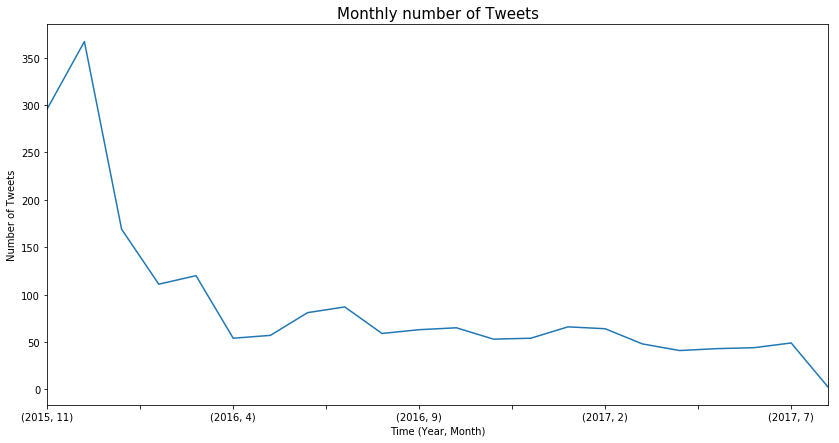

In [111]:
selected_data = df['tweet_id'].groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).count()
selected_data.plot('line')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time');

Most tweets were posted in December 2015 (367 tweets). Afterwards the number of tweets decreased rapidly April 2016 and remained fairly constant since then until July 2017.

#### Histograms of the variables

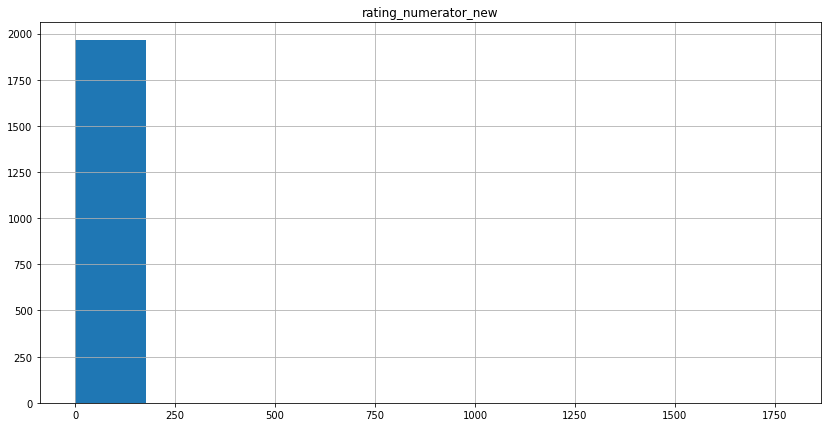

In [112]:
df.hist(column='rating_numerator_new');

We can't see the distribution of the bulk of the data as the 75% is 12 and the maximum is 1776. 

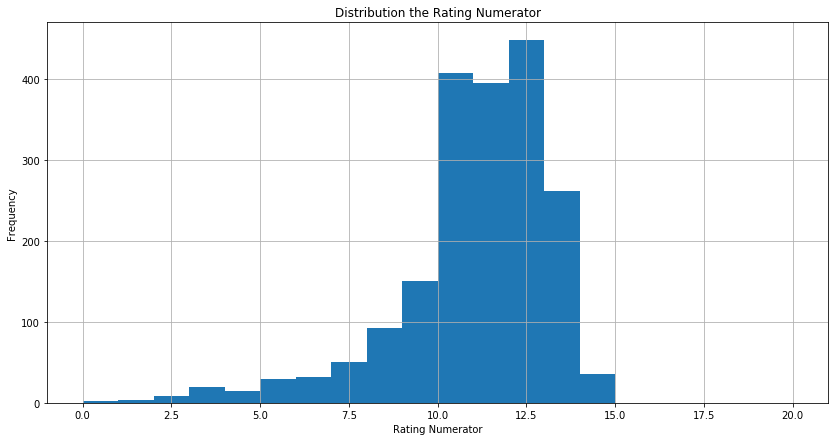

In [113]:
df.hist(column='rating_numerator_new', bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution the Rating Numerator')
plt.savefig('rating_numerator_dist');

The majority of rating numerators is between 10 an 12.

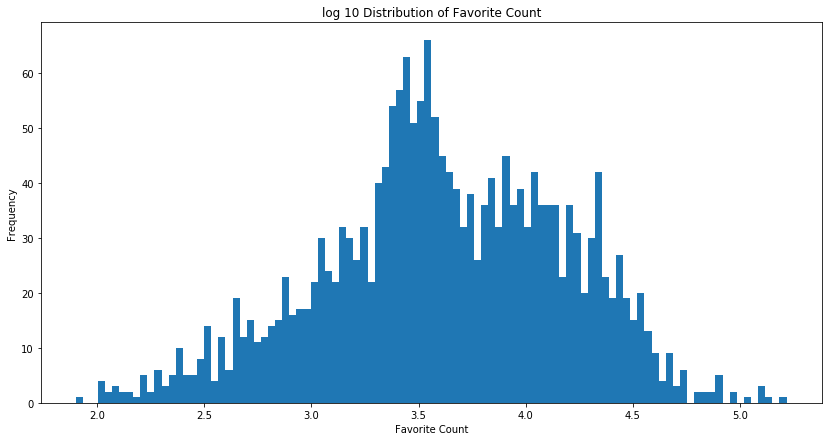

In [114]:
log_favorite = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_favorite, bins=100)
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')
plt.title('log 10 Distribution of Favorite Count')
plt.savefig('favorite_count_dist');

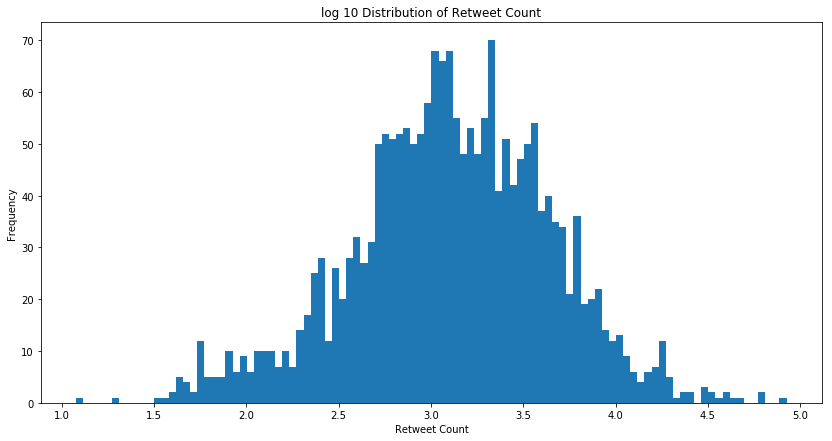

In [115]:
log_retweet = df['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, bins=100)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('log 10 Distribution of Retweet Count')
plt.savefig('retweet_count_dist');

Both distribution follow a normal distribution.

#### What is the most used source?

In [116]:
df['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

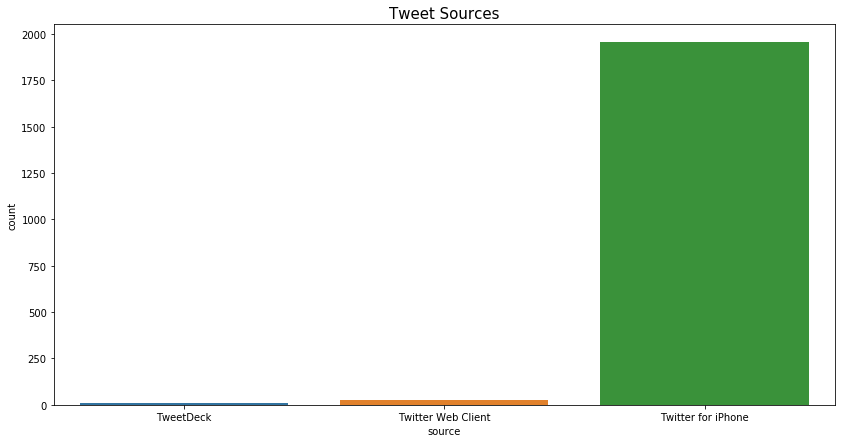

In [117]:
sns.countplot(data=df, x='source')
plt.title('Tweet Sources', size=15)
plt.savefig('most_used_twitter_source');

By far the most popular source is Twitter for iPhone followed by the Twitter Web Client and TweetDeck.

#### How many dogs were rated above 10?

In [118]:
df['rating_numerator_new'].value_counts().sort_index()

0.00       2  
1.00       4  
2.00       9  
3.00       19 
4.00       14 
5.00       30 
6.00       32 
7.00       50 
8.00       93 
9.00       149
9.75       1  
10.00      408
11.00      393
11.26      1  
11.27      1  
12.00      448
13.00      261
13.50      1  
14.00      35 
24.00      1  
44.00      1  
45.00      1  
60.00      1  
80.00      1  
84.00      1  
88.00      1  
99.00      1  
121.00     1  
143.00     1  
144.00     1  
165.00     1  
204.00     1  
420.00     1  
1776.00    1  
Name: rating_numerator_new, dtype: int64

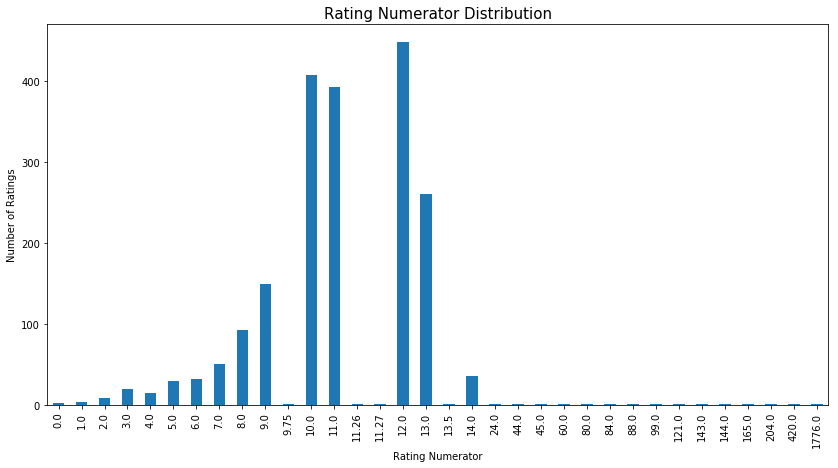

In [119]:
df['rating_numerator_new'].value_counts().sort_index().plot('bar')
plt.title ('Rating Numerator Distribution', size=15)
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Ratings')
plt.savefig('rating_numerator_distribution');

12 was the most often assigned numerator.

In [120]:
print('{} dogs were rated above 10.'.format(round(df.rating_numerator_new[df.rating_numerator_new > 10]).count()))

1155 dogs were rated above 10.


#### How many dog breeds could be predicted? 

In [121]:
print('The algorithm could predict the breed of {} dogs and failed in {} cases.'.format(df['breed_pred'].value_counts().sum(), (df['breed_pred'].isnull().sum())))

The algorithm could predict the breed of 1685 dogs and failed in 308 cases.


#### What are the 10 most frequent predicted dog breeds?

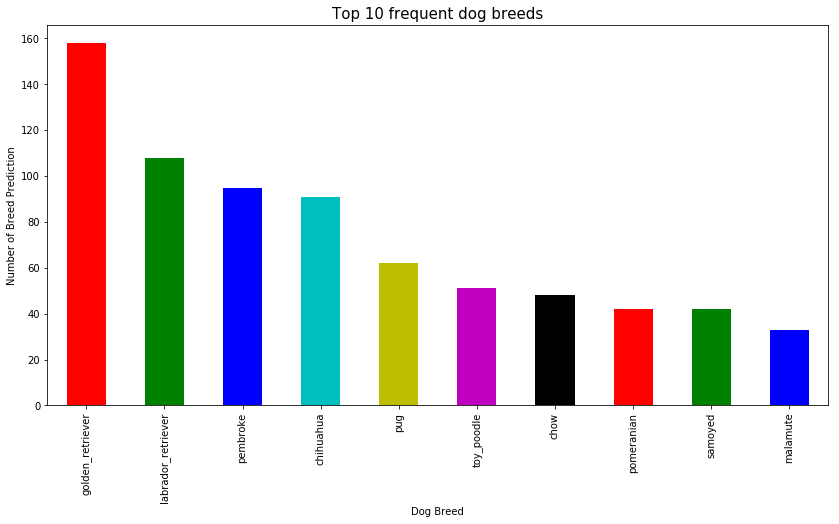

In [122]:
df['breed_pred'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = 'rgbcymk')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.savefig('most_frequent_breed');

In [123]:
df['breed_pred'].value_counts()[0:10]

golden_retriever      158
labrador_retriever    108
pembroke              95 
chihuahua             91 
pug                   62 
toy_poodle            51 
chow                  48 
samoyed               42 
pomeranian            42 
malamute              33 
Name: breed_pred, dtype: int64

#### How confident was the algorithm for these top 10 breeds?

In [124]:
name_list = df['breed_pred'].value_counts()[0:10].index.tolist()
name_list

['golden_retriever',
 'labrador_retriever',
 'pembroke',
 'chihuahua',
 'pug',
 'toy_poodle',
 'chow',
 'samoyed',
 'pomeranian',
 'malamute']

The most frequent predicted breed was golden retriever with 158 predictions.

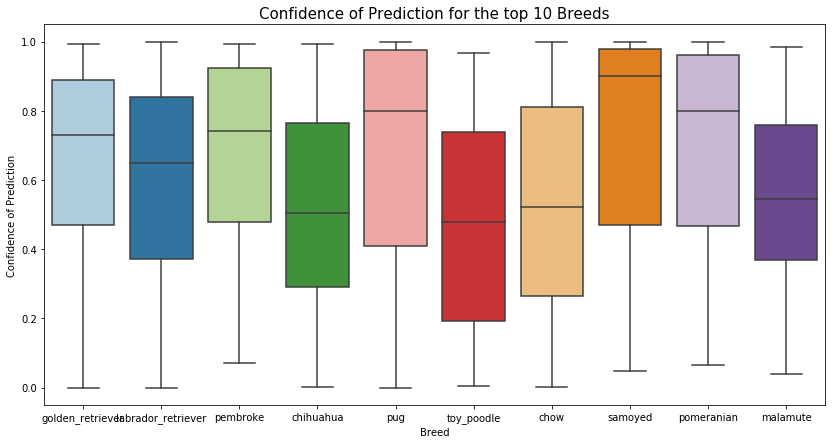

In [125]:
df_subset = df[df['breed_pred'].isin(name_list)]

sns.boxplot(x='breed_pred', y='pred_confidence', data=df_subset, order=name_list, palette='Paired')
plt.title('Confidence of Prediction for the top 10 Breeds', size=15)
plt.xlabel('Breed')
plt.ylabel('Confidence of Prediction')
plt.savefig('prediction_confidence_top_10');

For some breeds, the algorithm was pretty sure (i.e., pug, pomeranian, samoyed) and for others rather unsure (median confidence around 50%), like for chihuahua and toy_poodle. These are the top 10 predicted breeds with the corresponding confidence for their prediction. Clearly, the confidence varies between these dog breeds.

In [126]:
df.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1993.000000,1993.000000
mean,2672.062218,8779.357250
std,4757.910753,12862.919661
min,12.000000,80.000000
25%,595.000000,1888.000000
50%,1286.000000,3977.000000
75%,3059.000000,10963.000000
max,84189.000000,165021.000000


In [127]:
print('The mean Retweet Count for Dog Rating Numerators above 10 is {}.'.format
      (round(df.retweet_count[df.rating_numerator_new > 10].mean())))
print('The mean Retweet Count for Dog Rating Numerators under 10 is {}.'.format
      (round(df.retweet_count[df.rating_numerator_new >= 10].mean())))

print('The mean Favorite Count for Dog Rating Numerators above 10 is {}.'.format
      (round(df.favorite_count[df.rating_numerator_new > 10].mean())))
print('The mean Favorite Count for Dog Rating Numerators under 10 is {}.'.format
      (round(df.favorite_count[df.rating_numerator_new >= 10].mean())))

The mean Retweet Count for Dog Rating Numerators above 10 is 3727.0.
The mean Retweet Count for Dog Rating Numerators under 10 is 3136.0.
The mean Favorite Count for Dog Rating Numerators above 10 is 12692.0.
The mean Favorite Count for Dog Rating Numerators under 10 is 10440.0.


In [128]:
print('The mean Retweet Count for Dogs without a name is', 
                  round(df.retweet_count[df.names.isnull()].mean()))
print('The mean Retweet Count for Dogs with a name is', 
                  round(df.retweet_count[df.names.notnull()].mean()))

print('The mean Favorite Count for Dogs without a name is', 
                  round(df.favorite_count[df.names.isnull()].mean()))
print('The mean Favorite Count for Dogs with a name is', 
                  round(df.favorite_count[df.names.notnull()].mean()))

The mean Retweet Count for Dogs without a name is 2850.0
The mean Retweet Count for Dogs with a name is 2591.0
The mean Favorite Count for Dogs without a name is 8231.0
The mean Favorite Count for Dogs with a name is 9029.0


Tweets including dog names are more likely to be favorited but slightly less likely to be retweeted.

#### What are the 10 most frequent dog names?

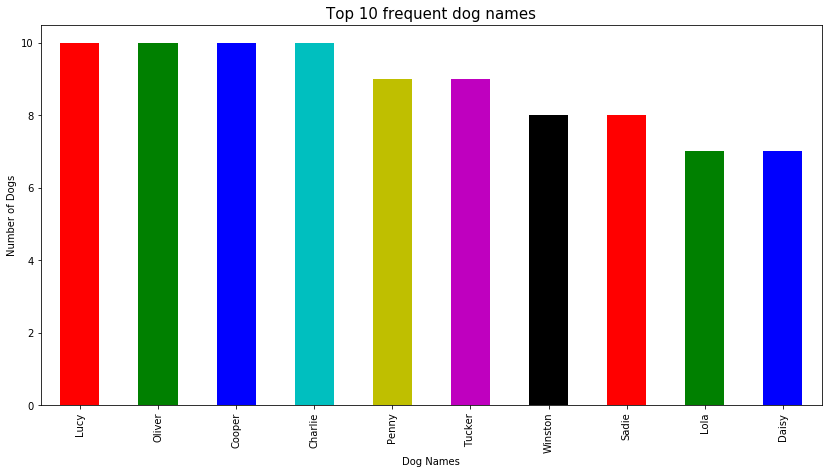

In [129]:
df['names'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = 'rgbcymk')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.savefig('most_frequent_names');

In [130]:
df['names'].value_counts()[0:10].sort_values(ascending=False)

Lucy       10
Oliver     10
Cooper     10
Charlie    10
Penny      9 
Tucker     9 
Winston    8 
Sadie      8 
Lola       7 
Daisy      7 
Name: names, dtype: int64

#### How looks the Distribution of Favorite Count compared to Retweet Count?

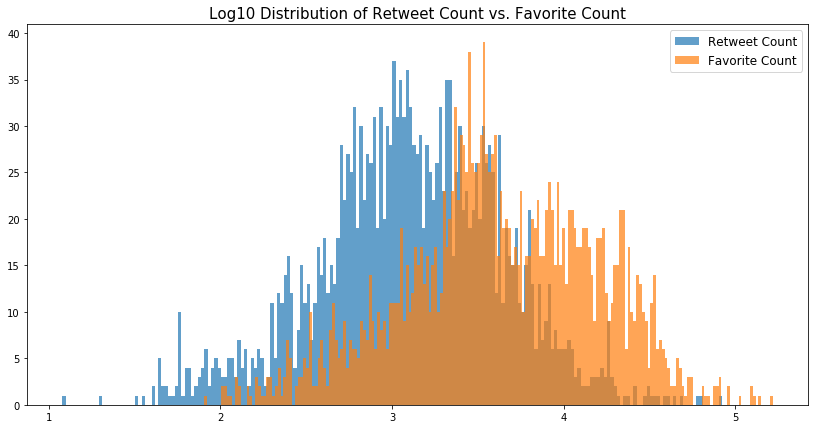

In [131]:
log_retweet = df['retweet_count'].apply(lambda x: np.log10(x))
log_favorite = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, alpha=0.7, bins=200, label='Retweet Count')
plt.hist(log_favorite, alpha=0.7, bins=200, label='Favorite Count')
plt.title('Log10 Distribution of Retweet Count vs. Favorite Count', size=15)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('retweet_favorite_dist');

Thus, people favor the tweets more often than retweet them. We can see that the distribution of favorite counts is located to the right of the distribution of retweet count. 

#### How changed the Retweet and Favorite Count over time?

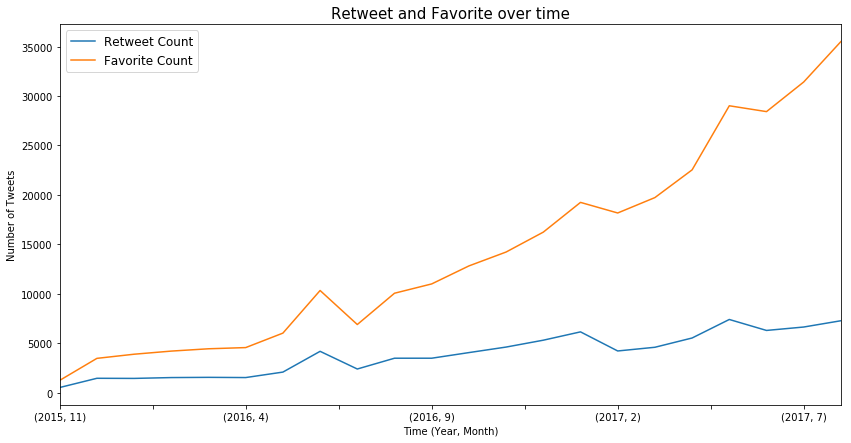

In [132]:
df.retweet_count.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).mean().plot('line')
df.favorite_count.groupby([df['timestamp'].dt.year, df['timestamp'].dt.month]).mean().plot('line')
plt.title('Retweet and Favorite over time', size =15)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend(('Retweet Count', 'Favorite Count'), fontsize=12)
plt.savefig('ret_fav');

Both, favorites and retweets, increased over the time. The first thing that caught my eye is that there are far more favorites than retweets.  While the favorite count increases strongly with the number of tweets, the retweet count seems almost indepedent of the number of tweets.

#### How are the variables correlated with each other?

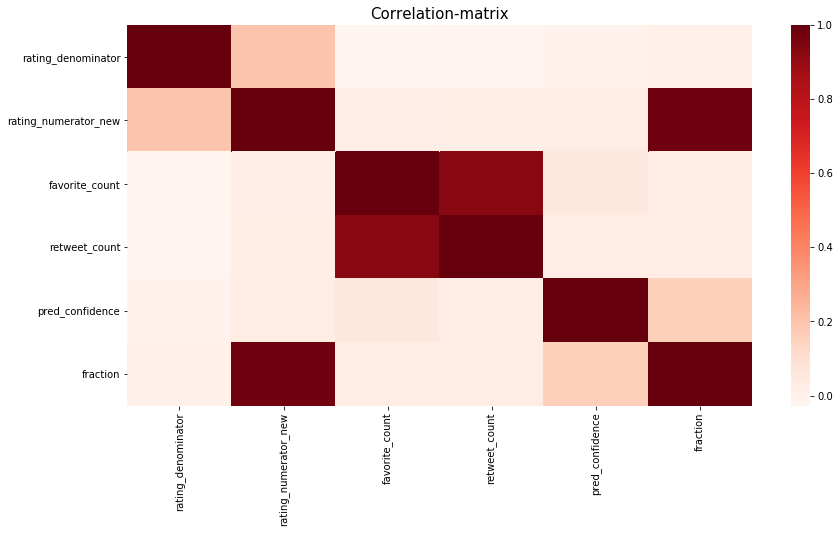

In [133]:
sns.heatmap(df.corr(), cmap="Reds")
plt.title('Correlation-matrix', size=15)
plt.savefig('heatmap');

Furthermore, retweet_count correlates highly with favorite_count (which is also no surprise). There are some weak and strong correlations. It is not surprising that fraction highly correlates with rating_numerator_new (as its calculated by this variable). 

#### What is the most frequent reported dog stage?

In [134]:
df['dog_stage'].value_counts()

pupper     222
doggo      69 
puppo      29 
floofer    7  
Name: dog_stage, dtype: int64

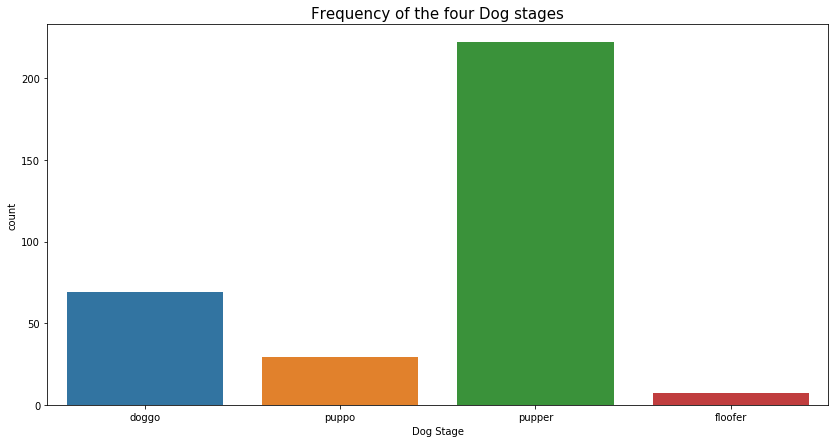

In [135]:
sns.countplot(data=df, x='dog_stage')
plt.title('Frequency of the four Dog stages', size=15)
plt.xlabel('Dog Stage')
plt.savefig('dog_stages');

Pupper is the most frequent reported dog stage (222), followed by doggo (69), puppo (29) and floofer (7).

#### Which dog stage received the highest rating?

In [136]:
df.groupby('dog_stage')['fraction'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,69.0,1.163768,0.169750,0.5,1.10,1.2,1.3,1.4
floofer,7.0,1.200000,0.115470,1.0,1.15,1.2,1.3,1.3
pupper,220.0,1.061605,0.180904,0.3,1.00,1.1,1.2,1.4
puppo,29.0,1.217241,0.119729,0.9,1.20,1.3,1.3,1.4


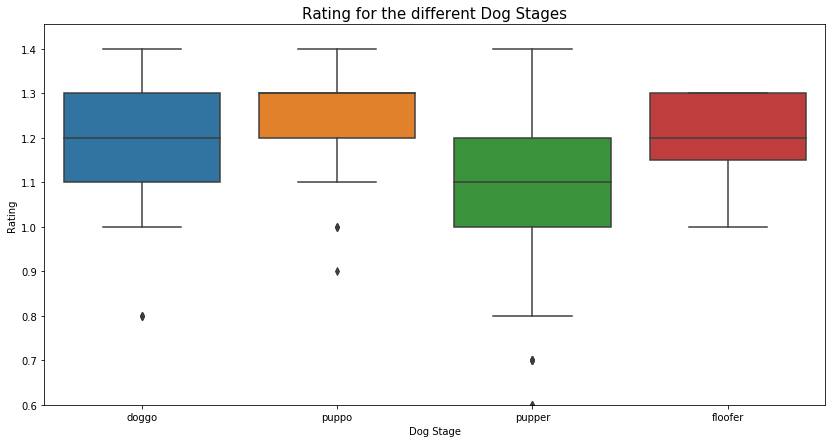

In [137]:
sns.boxplot(x='dog_stage', y='fraction', data=df)
plt.title('Rating for the different Dog Stages', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Rating')
plt.ylim(0.6,)
plt.savefig('rating_dog_stage');

To get a high rating, it might help to be a "puppo" or "floofer". Dogs with the dog stage "puppo" got the highest, dogs with the dog stage "pupper" the lowest average rating whereas "pupper" is by far the most often appearing dog stage. 

#### Which dog stage received the most retweets and which the most favorites?

In [138]:
print('The mean Retweet Count for doggos is {}.'.format((round(df.retweet_count[df.dog_stage == 'doggo'].mean()))))
print('The mean Favorite Count for doggos is {}.'.format((round(df.favorite_count[df.dog_stage == 'doggo'].mean()))))
print('---'*40)
print('The mean Retweet Count for floofers is {}.'.format((round(df.retweet_count[df.dog_stage == 'floofer'].mean()))))
print('The mean Favorite Count for floofers is {}.'.format((round(df.favorite_count[df.dog_stage == 'floofer'].mean()))))
print('---'*40)
print('The mean Retweet Count for puppos is {}.'.format((round(df.retweet_count[df.dog_stage == 'puppo'].mean()))))
print('The mean Favorite Count for puppos is {}.'.format((round(df.favorite_count[df.dog_stage == 'puppo'].mean()))))
print('---'*40)
print('The mean Retweet Count for puppers is {}.'.format((round(df.retweet_count[df.dog_stage == 'pupper'].mean()))))
print('The mean Favorite Count for puppers is {}.'.format((round(df.favorite_count[df.dog_stage == 'pupper'].mean()))))

The mean Retweet Count for doggos is 6271.0.
The mean Favorite Count for doggos is 18206.0.
------------------------------------------------------------------------------------------------------------------------
The mean Retweet Count for floofers is 4714.0.
The mean Favorite Count for floofers is 12732.0.
------------------------------------------------------------------------------------------------------------------------
The mean Retweet Count for puppos is 6487.0.
The mean Favorite Count for puppos is 22686.0.
------------------------------------------------------------------------------------------------------------------------
The mean Retweet Count for puppers is 2199.0.
The mean Favorite Count for puppers is 6931.0.


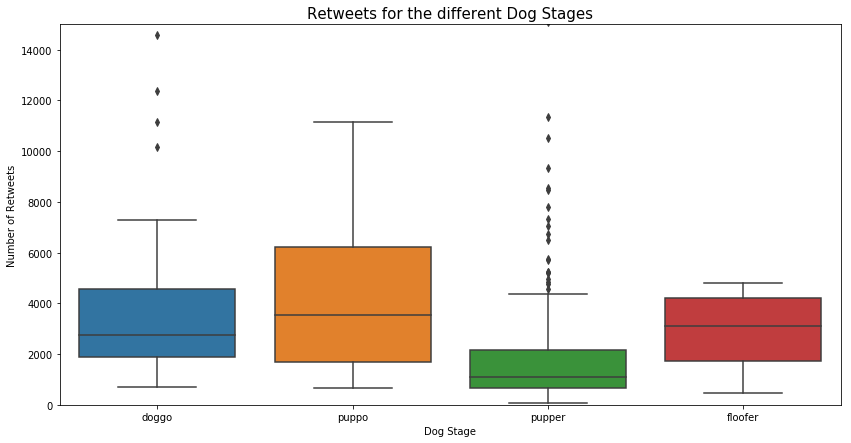

In [139]:
sns.boxplot(x='dog_stage', y='retweet_count', data=df)
plt.title('Retweets for the different Dog Stages', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Number of Retweets')
plt.ylim(0,15000)
plt.savefig('retweets_dog_stage');

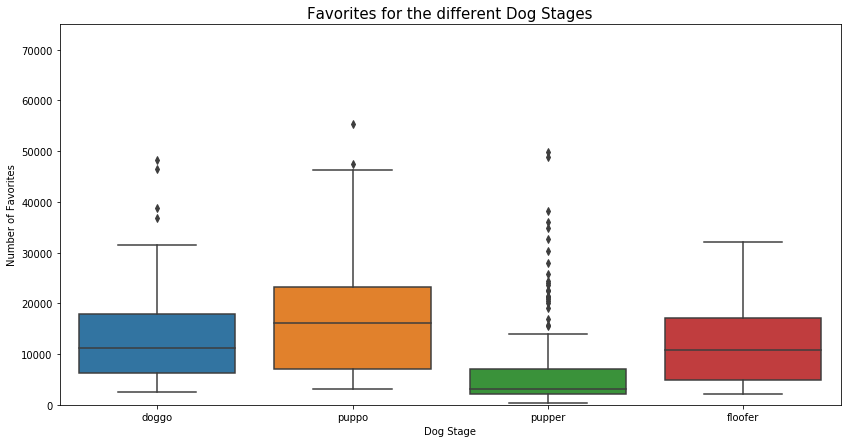

In [140]:
sns.boxplot(x='dog_stage', y='favorite_count', data=df)
plt.title('Favorites for the different Dog Stages', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Number of Favorites')
plt.ylim(0,75000)
plt.savefig('favorites_dog_stage');

## Conclusion
Puppos and Floofers are the most retweeted and favorited dog stages. Overall, doggo is the least retweeted and favorited dog stage.